In [1]:
import scipy.linalg
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.io
import rospy
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
import random
from sklearn.metrics import silhouette_score
from matplotlib.ticker import MaxNLocator

#from c_generated_code.acados_ocp_solver_pyx import AcadosOcpSolverCython

## Load angular parameters
Data = scipy.io.loadmat('Data_2.mat') 

In [2]:
Data_points = Data['Data_matrix'] 

In [3]:
Data_points.shape
Data_points

array([[ 9.21646905e+00,  9.26468682e+00,  9.31290459e+00, ...,
         3.59036323e+01,  3.60022041e+01,  3.60416328e+01],
       [-2.86674501e-02, -2.83699036e-02, -2.80647278e-02, ...,
        -2.31953430e+01, -2.31964111e+01, -2.31968384e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

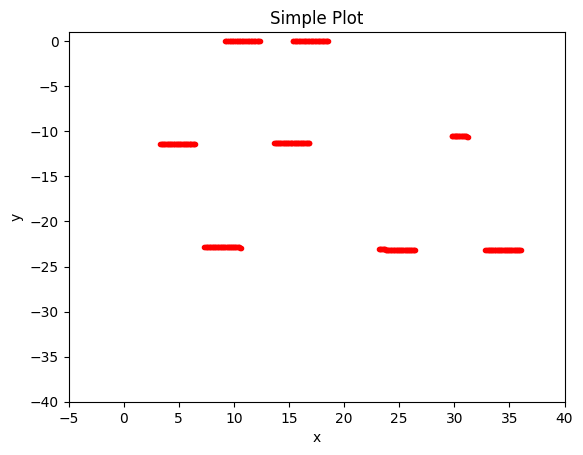

In [4]:
fig, ax = plt.subplots()

# Plot data
ax.plot(Data_points[0, :], Data_points[1, :], 'r.')

# Set a title and labels for the axes
ax.set_title('Simple Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Set axis limits
ax.set_xlim(-5, 40)  # Set x-axis limits
ax.set_ylim(-40, 1) # Set y-axis limits

# Show the plot
plt.show()

In [5]:
X = Data_points.T

In [6]:
X.shape

(361, 3)

In [7]:
silhouette_scores = []
for n_cluster in range(2, 20):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    silhouette_scores.append(sil_coeff)
    print(f"For n_clusters={n_cluster}, the silhouette score is {sil_coeff}")

For n_clusters=2, the silhouette score is 0.5532572662731072
For n_clusters=3, the silhouette score is 0.5882558317563583
For n_clusters=4, the silhouette score is 0.5927997707862166
For n_clusters=5, the silhouette score is 0.7244312219477831
For n_clusters=6, the silhouette score is 0.7548153835888138
For n_clusters=7, the silhouette score is 0.8481337375084418
For n_clusters=8, the silhouette score is 0.8774157866449489
For n_clusters=9, the silhouette score is 0.8376808936592239
For n_clusters=10, the silhouette score is 0.7978261608464599
For n_clusters=11, the silhouette score is 0.7583444726852469
For n_clusters=12, the silhouette score is 0.7338319189756237
For n_clusters=13, the silhouette score is 0.6827681633914106
For n_clusters=14, the silhouette score is 0.6752633148632979
For n_clusters=15, the silhouette score is 0.6338869069092663
For n_clusters=16, the silhouette score is 0.628420886126532
For n_clusters=17, the silhouette score is 0.6217123435913259
For n_clusters=18

In [8]:
max_value = max(silhouette_scores)
k = silhouette_scores.index(max_value) + 2
k

8

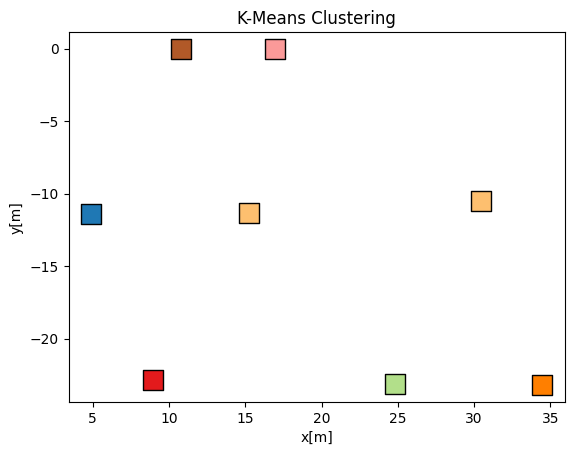

In [9]:

# Create KMeans instance
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model
kmeans.fit(X)

# Cluster centroids
centroids = kmeans.cluster_centers_

# Predict the cluster for each sample
labels = kmeans.predict(X)

# Generate a list of random colors
colors = ListedColormap([plt.cm.Paired(random.random()) for _ in range(k)])

# Plotting the clusters and centroids with random colors
for i in range(k):
    # Plot data points belonging to cluster i
    #plt.scatter(X[labels == i, 0], X[labels == i, 1], s=100, color=colors(i))
    
    # Plot the centroid of cluster i
    plt.scatter(centroids[i, 0], centroids[i, 1], s=200, color=colors(i), marker='s', edgecolor='black')

plt.title('K-Means Clustering')
plt.xlabel('x[m]')
plt.ylabel('y[m]')

# Show the plot
plt.show()

In [10]:
aux = centroids.T
aux.shape

(3, 8)

In [11]:
arrays_values = np.array([0, -11, -23])
aux_centroids = np.zeros((aux.shape[0], aux.shape[1]))


In [12]:
for i in range(0, arrays_values.shape[0]):
    for j in range(0, aux.shape[1]):
        distance = np.linalg.norm(arrays_values[i] - aux[1, j])
        if distance < 1.0:
            aux_centroids[0, j] = i + 1
            aux_centroids[1, j] = aux[0, j]

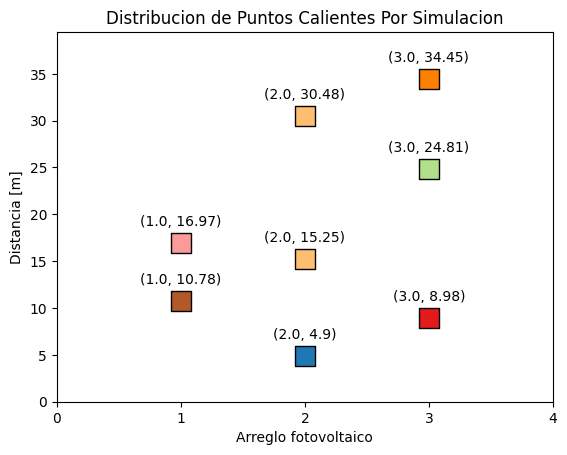

In [13]:
x_min, x_max = np.min(aux_centroids[0, :]) -1, np.max(aux_centroids[0,:]) +1
y_min, y_max = 0, np.max(aux_centroids[1,:]) +5
# Plotting the clusters and centroids with random colors
for i in range(0, aux_centroids.shape[1]):
    # Plot data points belonging to cluster i
    #plt.scatter(X[labels == i, 0], X[labels == i, 1], s=100, color=colors(i))
    
    # Plot the centroid of cluster i
    plt.scatter(aux_centroids[0, i], aux_centroids[1, i], s=200, color=colors(i), marker='s', edgecolor='black')
    plt.text(aux_centroids[0, i], aux_centroids[1, i]+1.5, f'({aux_centroids[0, i]}, {round(aux_centroids[1, i],2)})', color='black', ha='center', va='bottom')

plt.title('Distribucion de Puntos Calientes Por Simulacion')
plt.xlabel('Arreglo fotovoltaico')
plt.ylabel('Distancia [m]')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
# Show the plot
plt.savefig('Puntos Calientes Simulacion.pdf', format='pdf')
plt.show()